<h1>This is the Capstone project of IMB's Data Science Specialization</h1>

In [1]:
#Let's import the libraries
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


<h2>Description</h2>

Traffic in a huge city is a big problem. Car accidents happen everyday and it is the key factor of traffic. But there are many causes of a traffic accident such as unsafe road enviroment, lack of attention, mechanical problems, overspeeding, external problems and so on. If we could predict an accident we would leave home earlier to avoid being late to work and school/college. In fact, we can predict or calculate the probility of an accident to happen and its severity if we analyse data from past car accidents and try to find patterns the may increase the chance of congestions. For example, rainy days increses the number of accidents due the slippery road or poor visibility and more people tend to drive their way to work instead of taking subway or bus, due the rain. The more severe the accident is the more traffic will be.

For this capstone project I will be using the example dataset available on the week 1.This is the Seattle city shared traffic data which contains 37 features (or attributes) I will use to train and test the model to calculate the probability of severity accident to happen, which will the target for the model. But first I need to understand the data, check for missing data and etc.

<h2> Data Wrangling</h2>

In this section, I will  be cleaning, wrangling and understanding the data before we analysing it. The first goal here is to look at the data set, understand its shape, samples, columns and any useful information we can gather before cleaning, and transforming it. 

Let's upload the data set to Jupyter and store it into a dataframe called 'df_collision'.

In [3]:
#Loading CSV file to Jupyter
df_collisions = pd.read_csv(r"c:\1.csv")

C:\Users\steph\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Let's look at the first 5 row of the dataframe
df_collisions.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
#Let's see the shape of the dataset
df_collisions.shape

(194673, 38)

The second part is to find missing data, and if there is so, either delete it or fill with mean, median or frequency values.   

In [6]:
#Verifying the missing data and store it into 'missing_data' 
missing_data = df_collisions.isnull()

#Print the missing_data of all the columns

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

We can clearly see that there are columns missing data. Some columns have dozens of thousands lines of missing information and other have just a few lines. In order to get rid of all these missing data, I will, first, create a new dataframe, called **df_collisions_reduc** to store the features that is necessary to feed the model.

In [7]:
#I need to select the columns I need to feed the future model
df_collisions_reduc = df_collisions[['SEVERITYCODE', 'SEVERITYDESC', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
df_collisions_reduc

,SEVERITYCODE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,Injury Collision,2,0,0,2,Overcast,Wet,Daylight
1,1,Property Damage Only Collision,2,0,0,2,Raining,Wet,Dark - Street Lights On
2,1,Property Damage Only Collision,4,0,0,3,Overcast,Dry,Daylight
3,1,Property Damage Only Collision,3,0,0,3,Clear,Dry,Daylight
4,2,Injury Collision,2,0,0,2,Raining,Wet,Daylight
...,...,...,...,...,...,...,...,...,...
194668,2,Injury Collision,3,0,0,2,Clear,Dry,Daylight
194669,1,Property Damage Only Collision,2,0,0,2,Raining,Wet,Daylight
194670,2,Injury Collision,3,0,0,2,Clear,Dry,Daylight
194671,2,Injury Collision,2,0,1,1,Clear,Dry,Dusk


Now, it is time to drop the rows that contains missing data.

In [8]:
df_collisions_reduc.dropna(inplace = True)

C:\Users\steph\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now, looking at the different  categorical data in the **LIGHTCOND**, **WEATHER** and **ROADCOND**, we can see that it contains 'Other' and 'Unknown' as infos. It does not make sense keep these informations because we can look at the weather forecast on TV or Internet to check the weather and the road conditions based on the weather.

In [9]:
#Dropping the useless information
df_collisions_reduc = df_collisions_reduc[df_collisions_reduc.LIGHTCOND != 'Unknown']
df_collisions_reduc = df_collisions_reduc[df_collisions_reduc.WEATHER != 'Unknown']
df_collisions_reduc = df_collisions_reduc[df_collisions_reduc.ROADCOND != 'Unknown']
df_collisions_reduc = df_collisions_reduc[df_collisions_reduc.LIGHTCOND != 'Other']
df_collisions_reduc = df_collisions_reduc[df_collisions_reduc.WEATHER != 'Other']
df_collisions_reduc = df_collisions_reduc[df_collisions_reduc.ROADCOND != 'Other']

Let's look at the values of all the categorical data. Notice that 'Unknown' and 'Other' have disappeared.

In [10]:
df_collisions_reduc['LIGHTCOND'].value_counts()

Daylight                    112618
Dark - Street Lights On      46748
Dusk                          5648
Dawn                          2413
Dark - No Street Lights       1408
Dark - Street Lights Off      1114
Dark - Unknown Lighting          8
Name: LIGHTCOND, dtype: int64

In [11]:
df_collisions_reduc['WEATHER'].value_counts()

Clear                       108825
Raining                      32648
Overcast                     26923
Snowing                        825
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       107
Blowing Sand/Dirt               46
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [12]:
df_collisions_reduc['ROADCOND'].value_counts()

Dry               121490
Wet                46324
Ice                 1080
Snow/Slush           833
Standing Water       105
Sand/Mud/Dirt         65
Oil                   60
Name: ROADCOND, dtype: int64

Now, let's the categorical data to numerical data.

Now, let's store the key features in a variable called X, that it will be used to feed the model. Y will store our target variable

In [57]:
feature = df_collisions_reduc[['WEATHER', 'ROADCOND', 'LIGHTCOND']]
feature = pd.concat([feature, pd.get_dummies(df_collisions_reduc['WEATHER'])], axis = 1)
feature = pd.concat([feature, pd.get_dummies(df_collisions_reduc['ROADCOND'])], axis = 1)
feature = pd.concat([feature, pd.get_dummies(df_collisions_reduc['LIGHTCOND'])], axis = 1)
feature.drop(['WEATHER'], axis =1, inplace = True)
feature.drop(['ROADCOND', 'LIGHTCOND',], axis =1, inplace = True)
feature.head()

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [58]:
X = np.asarray(feature.tail(1000))
Y = np.asarray(df_collisions_reduc['SEVERITYDESC'].tail(1000))
X.shape

(1000, 23)

As a double check, let's look if there are missing data. **SPOILER ALERT:** they all desappeared!

In [15]:
missing_data2 = df_collisions_reduc.isnull()
for column in missing_data2.columns.values.tolist():
    print(column)
    print (missing_data2[column].value_counts())
    print("")

SEVERITYCODE
False    169957
Name: SEVERITYCODE, dtype: int64

SEVERITYDESC
False    169957
Name: SEVERITYDESC, dtype: int64

PERSONCOUNT
False    169957
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    169957
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    169957
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    169957
Name: VEHCOUNT, dtype: int64

WEATHER
False    169957
Name: WEATHER, dtype: int64

ROADCOND
False    169957
Name: ROADCOND, dtype: int64

LIGHTCOND
False    169957
Name: LIGHTCOND, dtype: int64



In [16]:
#Next step data standardization to avoid bias. Note that it is better do it after the data split but I am going to do it anyways
X= preprocessing.StandardScaler().fit(X).transform(X)

<h1>Models</h1>

I am gonna test all the classification model and I will use evaluation metrics to choose one, such as jaccard score, F1-Score and LogLoss

<h3>1 - KNN</h3>

The hardest part of K-Nearest Neighbor is to choose the right K. So I am going to calculate the best K through an iterate loop to make the right choice.

Let's split the data in 80% training set and 20% test set.

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [60]:
#Let's randomly initiate k equals to 7, just to have an idea
k = 25
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

#Let's apply the model in the test set
yhat = neigh.predict(X_test)
#Let's have a look in the accuracy scores
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.67
Test set Accuracy:  0.7


In [61]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

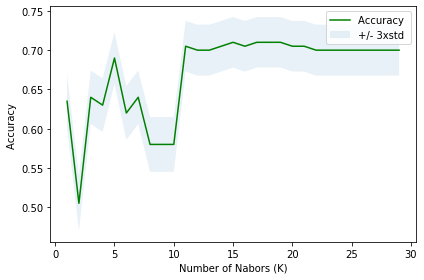

In [62]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [63]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.71 with k= 15


In [64]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.5805882352941176

In [23]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\steph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.705

We can see that the F1-Score is 0.58 and the Jaccard score is 0.705. 

<h3>2 - Decision Tree</h3>

Now that I have the training and test sets already done, it is time to try the second method, decision tree. I will continue to use numerical data instead of categorical ones to feed the decision tree.

In [65]:
from sklearn.tree import DecisionTreeClassifier
#Let's start with max_depth = 4 but I will iterate through several depths to maximize the accuracy
Tree2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree2 # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
#Let's feed out model 
Tree2.fit(X_train,y_train)
#Let's use the model into the test set
yhat2 = Tree2.predict(X_test)

In [67]:
#I need to look at the accuracy of the model
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat2))

DecisionTrees's Accuracy:  0.7


The accuracy is 0.7 and there is a lot of room for improvement. Now, I can iterate through the various values of max_depth to find the one thar maximize the accuracy. 

In [68]:
max_depth = 40
mean_acc = np.zeros((max_depth-1))
std_acc = np.zeros((max_depth-1))
ConfustionMx = [];
for n in range(1,max_depth):
    
    #Train Model and Predict  
    Tree2 = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    Tree2.fit(X_train,y_train)
    yhat2 = Tree2.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat2)

    
    std_acc[n-1]=np.std(yhat2==y_test)/np.sqrt(yhat2.shape[0])

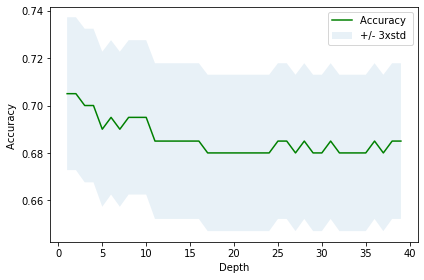

In [69]:
plt.plot(range(1,max_depth),mean_acc,'g')
plt.fill_between(range(1,max_depth),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Depth')
plt.tight_layout()
plt.show()

In [70]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.705 with k= 1


We can see that the best depth of our decision tree is between 1. Let's look at the F1-Score and Jaccard Score.

In [71]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat2, average='weighted') 

0.5814948335246842

In [72]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat2)

C:\Users\steph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.685

The F1-Score is slightly better than the first method but the jaccard score did not perform so well.

<h3>3 - SVM</h3>

The third method I am going to use is SVM. This time I will use the four main kernel functions: linear, polynomial, RBF and Sigmoid. I will choose the one that performs best.

<h5>3.1 - Linear</h5>

In [73]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
yhat3 = clf.predict(X_test)

In [75]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

                                precision    recall  f1-score   support

              Injury Collision       0.00      0.00      0.00        59
Property Damage Only Collision       0.70      0.99      0.82       141

                      accuracy                           0.69       200
                     macro avg       0.35      0.49      0.41       200
                  weighted avg       0.49      0.69      0.58       200

Confusion matrix, without normalization
[[139   2]
 [ 59   0]]


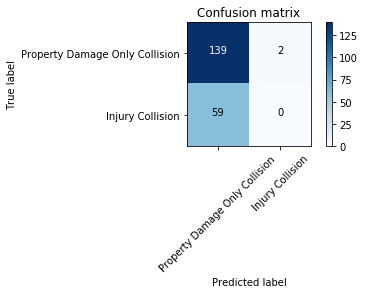

In [76]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat3, labels=['Property Damage Only Collision', 'Injury Collision'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat3))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage Only Collision','Injury Collision'],normalize= False,  title='Confusion matrix')

In [77]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat3, average='weighted') 

0.5781415929203539

In [78]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat3)

C:\Users\steph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.695

<h5>3.2 - Polynomial</h5>

In [79]:
from sklearn import svm
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [80]:
yhat4 = clf.predict(X_test)
yhat4 [0:5]

array(['Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision'], dtype=object)

In [81]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

                                precision    recall  f1-score   support

              Injury Collision       0.25      0.02      0.03        59
Property Damage Only Collision       0.70      0.98      0.82       141

                      accuracy                           0.69       200
                     macro avg       0.48      0.50      0.43       200
                  weighted avg       0.57      0.69      0.59       200

Confusion matrix, without normalization
[[138   3]
 [ 58   1]]


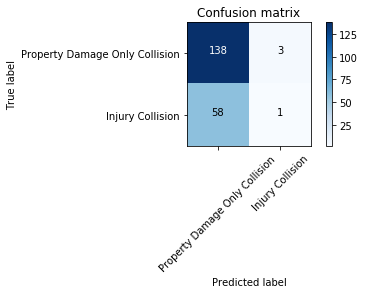

In [82]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat4, labels=['Property Damage Only Collision', 'Injury Collision'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat4))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage Only Collision','Injury Collision'],normalize= False,  title='Confusion matrix')

In [83]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat4, average='weighted') 

0.5867538034006876

In [84]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat4)

C:\Users\steph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.695

<h5>3.3 - RBF</h5>

In [85]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
yhat5 = clf.predict(X_test)
yhat5 [0:5]

array(['Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision'], dtype=object)

In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

                                precision    recall  f1-score   support

              Injury Collision       0.00      0.00      0.00        59
Property Damage Only Collision       0.70      1.00      0.83       141

                      accuracy                           0.70       200
                     macro avg       0.35      0.50      0.41       200
                  weighted avg       0.50      0.70      0.58       200

Confusion matrix, without normalization
[[141   0]
 [ 59   0]]


C:\Users\steph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


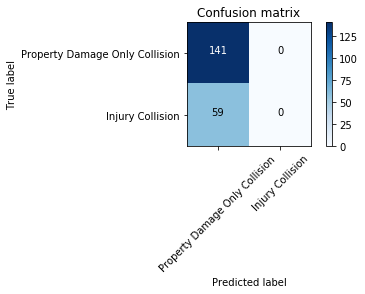

In [88]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat5, labels=['Property Damage Only Collision', 'Injury Collision'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat5))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage Only Collision','Injury Collision'],normalize= False,  title='Confusion matrix')

In [89]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat5, average='weighted') 

0.5830205278592375

In [90]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat5)

C:\Users\steph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.705

<h5>3.4 - Sigmoid</h5>

In [91]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
yhat6 = clf.predict(X_test)
yhat6 [0:5]

array(['Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision'], dtype=object)

In [93]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

                                precision    recall  f1-score   support

              Injury Collision       0.39      0.27      0.32        59
Property Damage Only Collision       0.73      0.82      0.77       141

                      accuracy                           0.66       200
                     macro avg       0.56      0.55      0.55       200
                  weighted avg       0.63      0.66      0.64       200

Confusion matrix, without normalization
[[116  25]
 [ 43  16]]


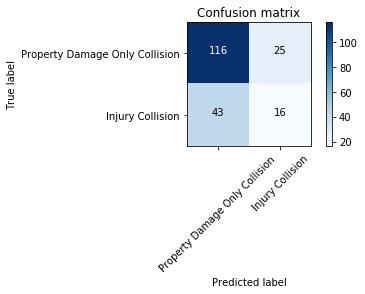

In [94]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat6, labels=['Property Damage Only Collision', 'Injury Collision'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat6))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage Only Collision','Injury Collision'],normalize= False,  title='Confusion matrix')

In [95]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat6, average='weighted') 

0.6395999999999998

In [96]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat6)

C:\Users\steph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.66

<h3>Evaluation</h3>

We can see that all the methods retuned almost the same evaluation parameters. And all of them did not performed so well. So, we can pick any of the three methods to apply in our data. I changed some selected features and run several time with different X's and Y's but all the results were the same.